Populating the interactive namespace from numpy and matplotlib
0.0
1.0
2.0
3.0
4.0
0.9240790698185528


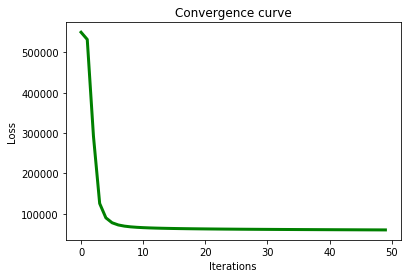

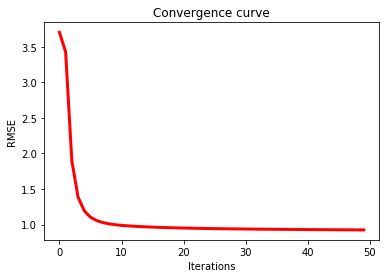

In [5]:
from pylab import *
import numpy as np
import random
import math
%pylab inline

def SGD(train,test,N,M,eta,K,lambda_1,lambda_2,Step):
    # train: train data
    # test: test data
    # N:the number of user
    # M:the number of item
    # eta: the learning rata
    # K: the number of latent factor
    # lambda_1,lambda_2: regularization parameters
    # Step: the max iteration
    U = np.random.normal(0, 0.1, (N, K))
    V = np.random.normal(0, 0.1, (M, K))
    L=1000.0
    rmse=[]
    loss=[]
    for ste in range(Step):
        los=0.0
        for data in train:
            u=data[0]
            i=data[1]
            r=data[2]

            e=r-np.dot(U[u],V[i].T)            
            U[u]=U[u]+eta*(e*V[i]-lambda_1*U[u])
            V[i]=V[i]+eta*(e*U[u]-lambda_2*V[i])

            los=los+0.5*(e**2+lambda_1*np.square(U[u]).sum()+lambda_2*np.square(V[i]).sum())
        loss.append(los)
        rms=RMSE(U,V,test)
        rmse.append(rms)
        if los<L:
            break
        if ste%10==0:
            print(ste/10)
    return loss,rmse,U,V

           
def RMSE(U,V,test):
    count=len(test)
    sum_rmse=0.0
    for t in test:
        u=t[0]
        i=t[1]
        r=t[2]
        pr=np.dot(U[u],V[i].T)
        sum_rmse+=np.square(r-pr)
    rmse=np.sqrt(sum_rmse/count)
    return rmse


def Load_data(filedir,ratio):
    user_set={}
    item_set={}
    N=0;#the number of user
    M=0;#the number of item
    u_idx=0
    i_idx=0
    data=[]
    f = open(filedir)
    for line in f.readlines():
        u,i,r,t=line.split()
        if int(u) not in user_set:
            user_set[int(u)]=u_idx
            u_idx+=1
        if int(i) not in item_set:
            item_set[int(i)]=i_idx
            i_idx+=1
        data.append([user_set[int(u)],item_set[int(i)],int(r)])
    f.close()
    N=u_idx;
    M=i_idx;

    np.random.shuffle(data)
    train=data[0:int(len(data)*ratio)]
    test=data[int(len(data)*ratio):]
    return N,M,train,test


def Figure(loss,rmse):
    fig1=plt.figure('LOSS')
    x = range(len(loss))
    plot(x, loss, color='g',linewidth=3)
    plt.title('Convergence curve')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

    fig2=plt.figure('RMSE')
    x = range(len(rmse))
    plot(x, rmse, color='r',linewidth=3)
    plt.title('Convergence curve')
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    show()

#----------------------------SELF TEST----------------------------#

dir_data="./u.data"
ratio=0.8
N,M,train,test=Load_data(dir_data,ratio)

eta=0.005
K=10
lambda_1=0.1
lambda_2=0.1
Step=50
loss,rmse,U,V=SGD(train,test,N,M,eta,K,lambda_1,lambda_2,Step)
print(rmse[-1])
Figure(loss,rmse)

In [6]:
Rhat = np.dot(U,V.T)

In [10]:
Rhat.shape

(943, 1682)

In [11]:
N

943

In [12]:
M

1682